In [4]:
#https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## About the data

###### https://www.cs.toronto.edu/~kriz/cifar.html
#### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

#### The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [6]:
#convert to 1D array
y_train = y_train.reshape(-1,)
print(y_train[:5])
y_test = y_test.reshape(-1,)

[6 9 9 4 1]


In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
#Let's plot some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

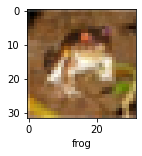

In [11]:
plot_sample(X_train, y_train, 0)

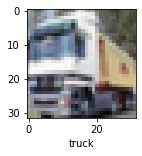

In [12]:
plot_sample(X_train, y_train, 1)

## Normalizing the training data

In [13]:
#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
#### so to normalize to 0-->1 range, we need to divide it by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

##  Build CNN model for image classification

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #when y is one-hot-encoded vector the use 'categorical_crossentroy' otherwise, 'sparse_categorical_crossentropy'
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4516 - accuracy: 0.4801
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1044 - accuracy: 0.6138
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9779 - accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8914 - accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8263 - accuracy: 0.7132
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7680 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7160 - accuracy: 0.7523
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6676 - accuracy: 0.7678
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6297 - accuracy: 0.7812
Epoch 10/10
1563/1563 [==============================] - 34s 22m

In [17]:
cnn.evaluate(X_test,y_test)
cnn.evaluate(X_train,y_train)###overfitting....

1563/1563 [==============================] - 8s 5ms/step - loss: 0.5242 - accuracy: 0.8176


[0.5241813659667969, 0.8176400065422058]

In [18]:
### metrics for each class
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[2.5511039e-03, 8.8905329e-03, 4.3192562e-03, 6.4669859e-01,
        6.0286310e-02, 1.3958979e-01, 1.6933301e-03, 2.8762503e-03,
        8.1063561e-02, 5.2031256e-02],
       [1.5017386e-02, 9.1936730e-02, 1.8565920e-06, 4.1618041e-06,
        1.2255733e-06, 3.4340072e-08, 4.0044273e-07, 5.3884430e-09,
        8.9159054e-01, 1.4476690e-03],
       [1.0104332e-01, 1.9692056e-01, 6.7506032e-04, 1.3949908e-02,
        1.4749484e-03, 6.3590711e-04, 1.1711636e-03, 5.5758064e-03,
        4.7219238e-01, 2.0636098e-01],
       [9.8986745e-01, 1.8962962e-03, 4.7721891e-04, 6.7338871e-04,
        3.6911646e-04, 4.6911493e-05, 8.1058731e-04, 4.6022749e-05,
        5.1294151e-03, 6.8369438e-04],
       [8.3837341e-07, 3.3832656e-04, 6.6739051e-03, 1.1205285e-02,
        7.4620908e-01, 1.5332622e-03, 2.3401609e-01, 4.3372897e-06,
        1.7757382e-05, 1.1501489e-06]], dtype=float32)

In [37]:
#get the index of each class
from sklearn.metrics import confusion_matrix , classification_report
y_predicted_labels = [np.argmax(element) for element in y_pred]
print(y_predicted_labels[:5])
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

[3, 8, 8, 0, 4]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.69      0.73      1000
           1       0.87      0.76      0.81      1000
           2       0.70      0.49      0.58      1000
           3       0.53      0.46      0.49      1000
           4       0.54      0.76      0.63      1000
           5       0.59      0.65      0.62      1000
           6       0.82      0.75      0.78      1000
           7       0.71      0.78      0.74      1000
           8       0.82      0.83      0.83      1000
           9       0.73      0.85      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [26]:
#truth
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [27]:
classes[y_predicted_labels[3]]

'airplane'

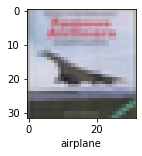

In [28]:
plot_sample(X_test, y_test,3)

Text(69.0, 0.5, 'Truth')

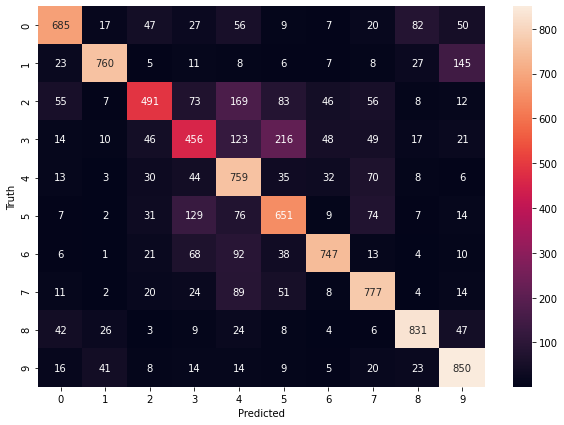

In [33]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
len(y_test)

10000